In [1]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l
import random

In [2]:
def synthetic_data(w,b,num_examples):
    #人工(生成)数据
    X=torch.normal(0,1,(num_examples,len(w)))  #生成num_examples个样本，这些样本特征数为len(w)，并服从μ=0，σ=1的高斯分布
    y=torch.matmul(X, w) + b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

In [3]:
print(features[:2],'\n',labels[:2])

tensor([[-0.6119, -0.1311],
        [-1.5899, -0.6522]]) 
 tensor([[3.4251],
        [3.2519]])


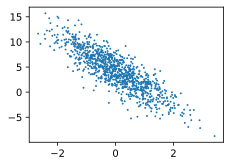

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [5]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [6]:
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(f'X={X}\ny={y}\n')
    break

X=tensor([[-0.8874, -1.0909],
        [-0.3117, -0.6176],
        [ 0.9371,  1.9511],
        [-0.1236,  0.1788],
        [-0.1072,  0.5385],
        [ 1.0216, -1.5820],
        [-0.7125, -0.4027],
        [-0.9925, -0.1669],
        [ 0.0706,  1.0639],
        [ 0.0311,  2.8999]])
y=tensor([[ 6.1317],
        [ 5.6857],
        [-0.5286],
        [ 3.3594],
        [ 2.1646],
        [11.6193],
        [ 4.1484],
        [ 2.7832],
        [ 0.7222],
        [-5.5997]])



In [19]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
w.shape,b.shape

(torch.Size([2, 1]), torch.Size([1]))

In [12]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [13]:
def squared_loss(y_hat,y):
    #计算每一组样本的损失
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [14]:
#使用with torch.no_grad():表明当前计算不需要反向传播，使用之后，强制后边的内容不进行计算图的构建
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()
        

In [20]:
#开始训练：
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        y_hat=net(X,w,b)
        l=loss(y_hat,y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)  #计算这一批次的损失，每个样本的分损失；
        print(f'epochs:{epoch+1},\tloss:{train_l.mean():f}')

epochs:1,	loss:0.040949
epochs:2,	loss:0.000168
epochs:3,	loss:0.000054


In [22]:
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

w的估计误差：tensor([ 0.0002, -0.0002], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0005], grad_fn=<RsubBackward1>)


In [23]:
#尝试将w，b初始化为0
w=torch.zeros([2,1],requires_grad=True)
b=torch.zeros(1,requires_grad=True)
w.shape,b.shape

(torch.Size([2, 1]), torch.Size([1]))

In [26]:
#开始训练：
lr=0.03
num_epochs=3
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        y_hat=net(X,w,b)
        print(y_hat.shape,y.shape)
        l=loss(y_hat,y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)  #计算这一批次的损失，每个样本的分损失；
        print(f'epochs:{epoch+1},\tloss:{train_l.mean():f}')

torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])
torch.Size([10, 1]) torch.Size([10, 1])


In [25]:
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

w的估计误差：tensor([ 0.0002, -0.0003], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0003], grad_fn=<RsubBackward1>)
